In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [157]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


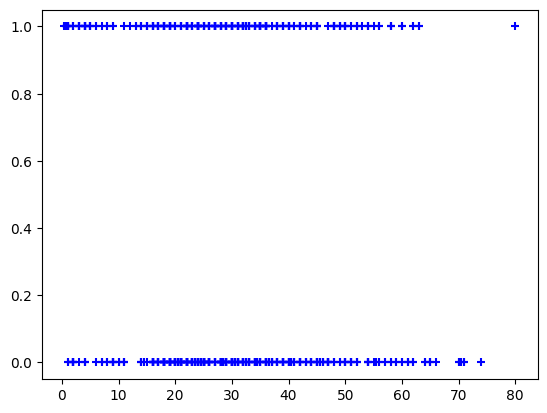

In [158]:
plt.scatter(df['Age'],df.Survived, marker = '+',color = 'blue')

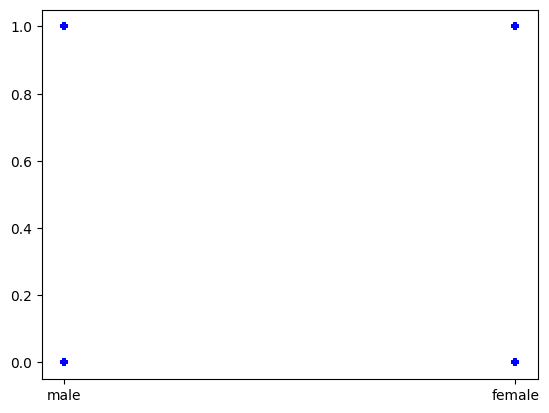

In [159]:
plt.scatter(df['Sex'],df.Survived, marker = '+',color = 'blue')

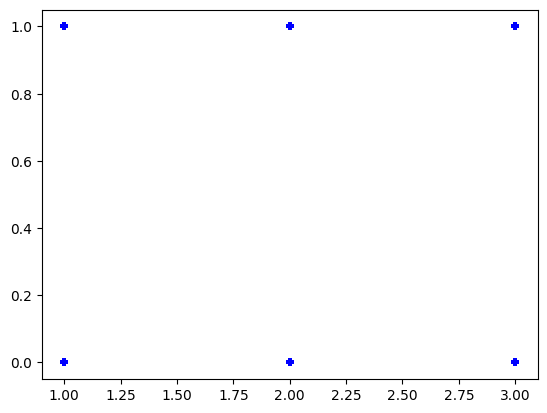

In [160]:
plt.scatter(df['Pclass'],df.Survived, marker = '+',color = 'blue')

In [161]:
dummy = pd.get_dummies(df.Sex,dtype=int)
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [162]:
df.drop(['Sex'],axis='columns',inplace=True)

In [163]:
df = pd.concat([df,dummy],axis = 'columns')
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [164]:
df['Age'].isnull().sum()

177

In [189]:
df['Pclass'].isnull().sum()

0

In [190]:
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [191]:
df['Age'].fillna(mean_age,inplace=True)

In [192]:
y = df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [193]:
x = df[['Age','female','male','Pclass','SibSp','Fare']]
x.head()

,Age,female,male,Pclass,SibSp,Fare
0,22.0,0,1,3,1,7.2500
1,38.0,1,0,1,1,71.2833
2,26.0,1,0,3,0,7.9250
3,35.0,1,0,1,1,53.1000
4,35.0,0,1,3,0,8.0500


In [194]:
model = linear_model.LinearRegression()

In [195]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [196]:
model.fit(x_train,y_train)

LinearRegression()

In [197]:
model.predict(x_test)

array([ 0.13147289,  0.68455517,  0.45154029,  0.47054342,  0.5400343 ,
        0.4065169 ,  0.22433962,  0.45253501,  0.98014423,  0.11408793,
        0.07026412,  0.67003173,  0.62971243,  0.58933746,  0.68004008,
        0.1516492 ,  0.08596937,  0.11299621,  0.06789359,  0.27324688,
        0.11254256,  0.11289699,  0.439774  ,  0.45320236,  0.16112599,
        0.11299621,  0.13933657,  1.02902499,  0.58766915,  0.12371496,
        0.14867643,  0.27494823,  0.87319858,  0.86415154,  0.01584516,
        0.14247294,  0.03021884,  0.53962598,  0.48044791,  0.51375459,
        0.74979412,  0.1677917 ,  0.58769467,  0.09268898,  0.11314368,
        0.09217285,  0.94352958,  0.29499691,  0.71770037,  0.19924718,
        0.67401935,  0.82479869,  0.72077263,  0.18032347,  0.16784559,
        0.46376394,  0.55403153,  0.58766915, -0.03499816,  0.69046377,
        0.10417852,  0.18049075,  0.54361457,  0.96873282,  0.74927804,
        0.11299621,  0.01574165,  1.03115603,  0.06485382,  0.31